# Wine Quality Classification Project
## Team Name : Quant_Boys
## Teammate 1 : Arnab Bannerjee (B2430040)
## Teammate 2 : Rudrajit Dey (B2430055)

## 1. Importing necessary libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import time
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Expolration

### 2.1. Loading the dataset

In [ ]:
data_path = '/content/winequality-red.csv'
wine_data = pd.read_csv(data_path)

In [ ]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5
1595,5.900,0.550,0.100,2.200,0.062,39.000,51.000,0.995,3.520,0.760,11.200,6
1596,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6
1597,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5


### 2.2. Exploration

In [ ]:
wine_data['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


## 3. Data Preparation for Binary Classification

### 3.1. Defining target variable `quality` as binary variable `quality label`

In [ ]:
wine_data['quality_label'] = (wine_data['quality'] >= 6).astype(int)

### 3.2. Furthur Expolration

In [ ]:
wine_data.shape

(1599, 13)

In [ ]:
wine_data_bi = wine_data.drop(columns=['quality'])

In [ ]:
wine_data_bi.shape

(1599, 12)

In [ ]:
wine_data_bi['quality_label'].value_counts()

,count
quality_label,
1,855
0,744


### 3.3. Data visualization

#### i) Histograms of each feature

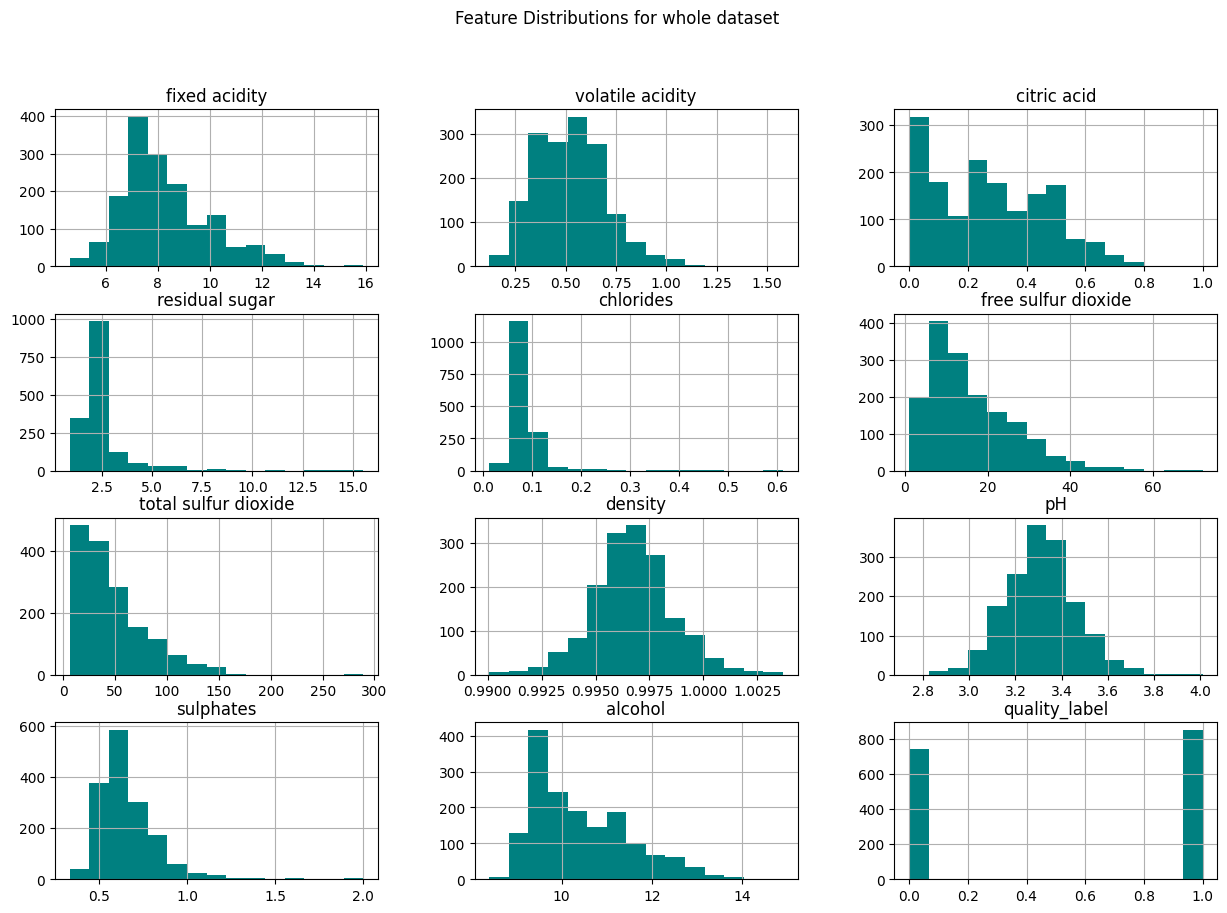

In [ ]:
wine_data_bi.hist(bins=15, figsize=(15, 10), color='teal')
plt.suptitle("Feature Distributions for whole dataset")
plt.show()

#### ii) Correlation Matrix with Heatmap

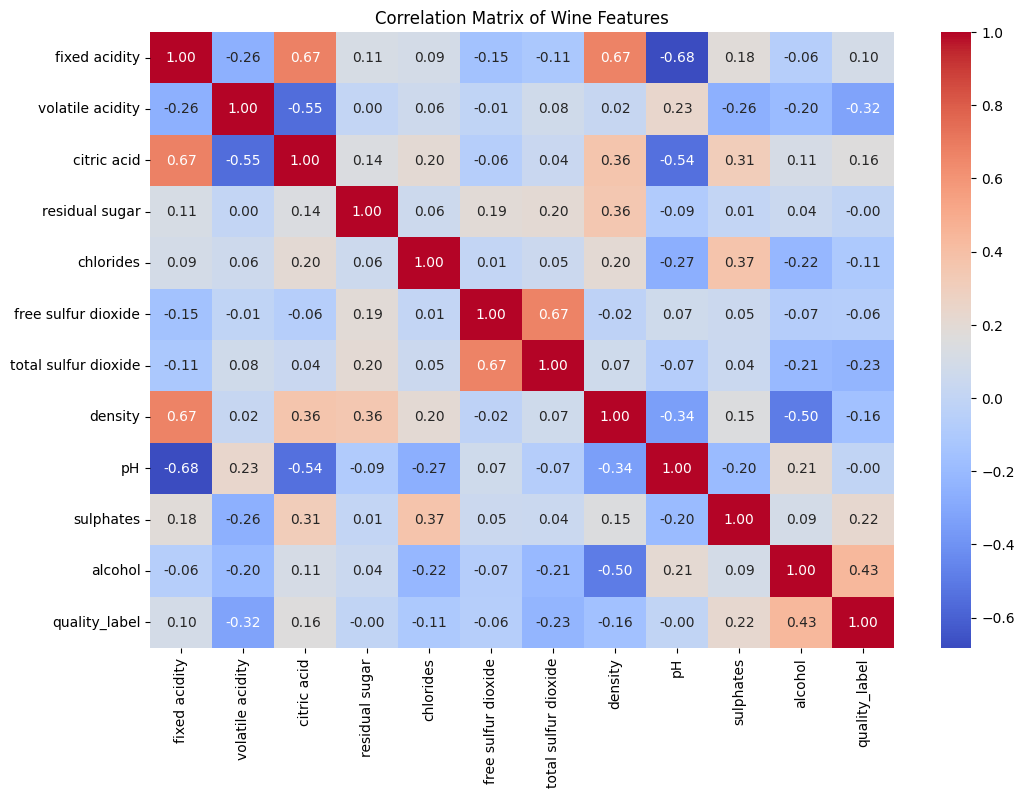

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data_bi.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Wine Features")
plt.show()

## 4. Outlier Handling

### 4.1. Calculating IQR, lower and upper bounds for all columns of `wine_data_bi`

In [ ]:
Q1 = wine_data_bi.quantile(0.25)
Q3 = wine_data_bi.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a DataFrame for the bounds
bounds_df = pd.DataFrame({'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

# Display the bounds DataFrame
print("Lower and Upper Bounds for Outlier Detection:")
print(bounds_df)

Lower and Upper Bounds for Outlier Detection:
                      Lower Bound  Upper Bound
fixed acidity               3.950       12.350
volatile acidity            0.015        1.015
citric acid                -0.405        0.915
residual sugar              0.850        3.650
chlorides                   0.040        0.120
free sulfur dioxide       -14.000       42.000
total sulfur dioxide      -38.000      122.000
density                     0.992        1.001
pH                          2.925        3.685
sulphates                   0.280        1.000
alcohol                     7.100       13.500
quality_label              -1.500        2.500


### 4.2. Filtering data to remove outliers

In [ ]:
wine_data_binary = wine_data_bi[~((wine_data_bi < lower_bound) | (wine_data_bi > upper_bound)).any(axis=1)]

# Display the shape of the original and filtered DataFrames
print("Original DataFrame shape:", wine_data_bi.shape)
print("DataFrame shape after removing outliers:", wine_data_binary.shape)

Original DataFrame shape: (1599, 12)
DataFrame shape after removing outliers: (1194, 12)


### 4.3. Exploation

In [ ]:
wine_data_binary.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### 4.4. Data Visualization after Outlier Removal

#### i) Histograms of each feature

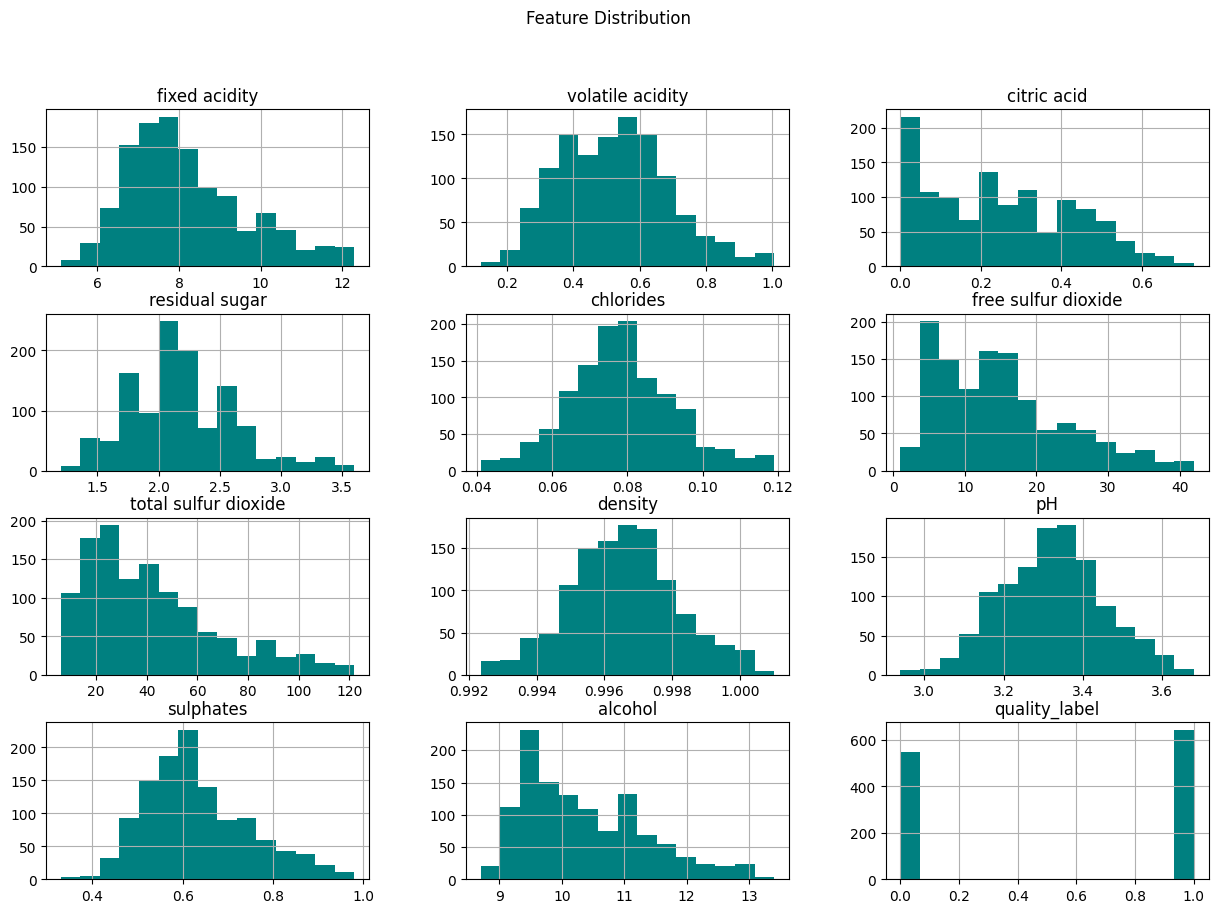

In [ ]:
wine_data_binary.hist(bins=15, figsize=(15, 10), color='teal')
plt.suptitle("Feature Distribution")
plt.show()

#### ii) Correlation Matrix with Heatmap

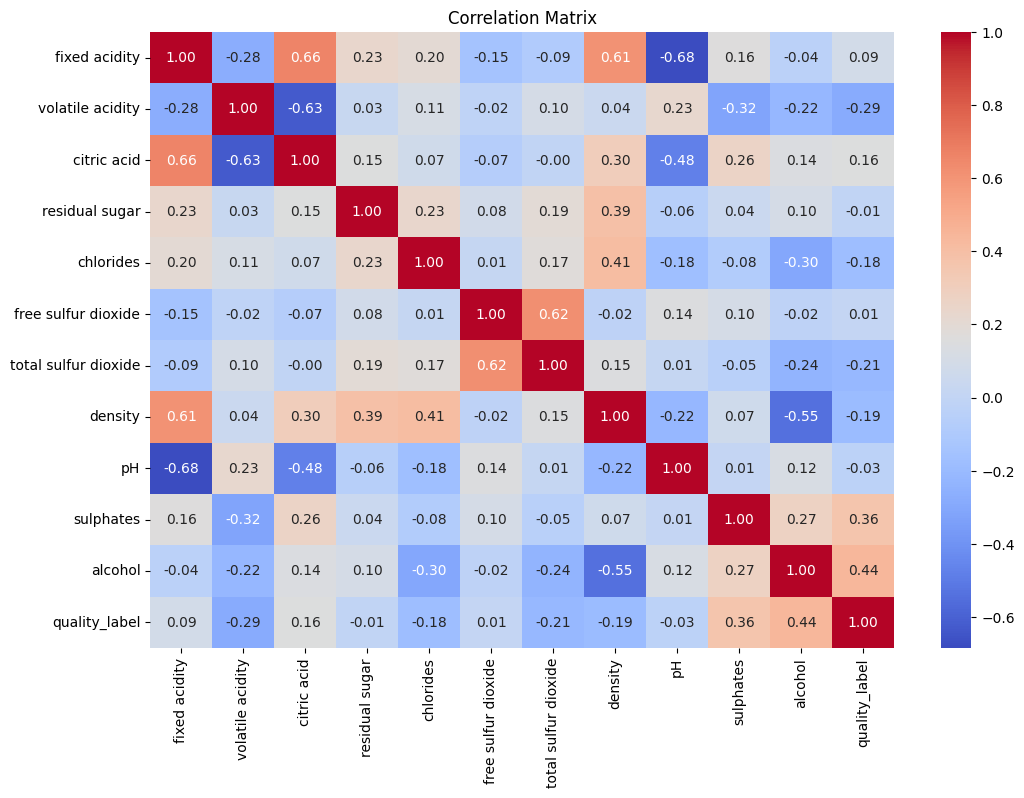

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data_binary.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 5. Data Splitting and Preprocessing

### 5.1. Train-test split with Stratified Sampling

#### Ensuring y is aligned with `wine_data_binary` after outlier removal

In [ ]:
# Reset index of wine_data_binary to avoid potential index mismatches
wine_data_binary = wine_data_binary.reset_index(drop=True)
X = wine_data_binary.drop('quality_label', axis=1)

# Align y with wine_data_binary using the original index
y = wine_data_binary['quality_label']

#### Performing Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 5.2. Exploration

In [ ]:
wine_data_binary.shape

(1194, 12)

In [ ]:
X_train.shape

(955, 11)

## 6. Feature Engineering

### 6.1. Feature selection with Random Forest

##### Training a Random Forest Model

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### Feature Importance

In [ ]:
feature_importance = rf_model.feature_importances_

##### Creating a DataFrame for feature importances

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

##### Selecting important features

In [ ]:
median_importance = feature_importance_df['Importance'].median()
important_features = feature_importance_df[feature_importance_df['Importance'] > median_importance]['Feature']

In [ ]:
important_features

,Feature
10,alcohol
9,sulphates
7,density
1,volatile acidity
6,total sulfur dioxide


##### Creating a new DataFrame with important features

In [ ]:
X_selected = X_train[important_features]

##### Transforming the `X_test` DataFrame with selected features

In [ ]:
X_test = X_test[X_selected.columns]

### 6.2. Plotting feature importances

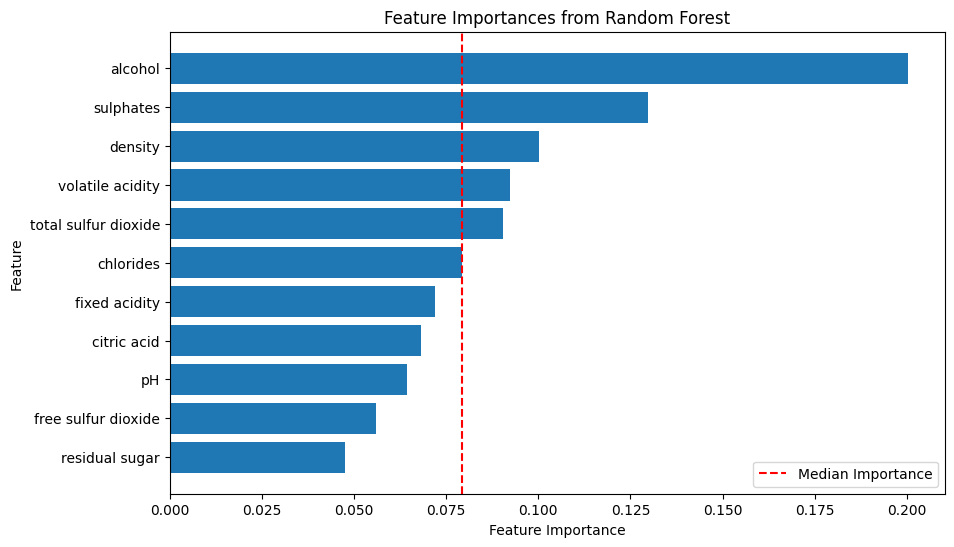

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.axvline(median_importance, color='red', linestyle='--', label='Median Importance')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

### 6.3. Plotting Scatter Matrix of Important Features

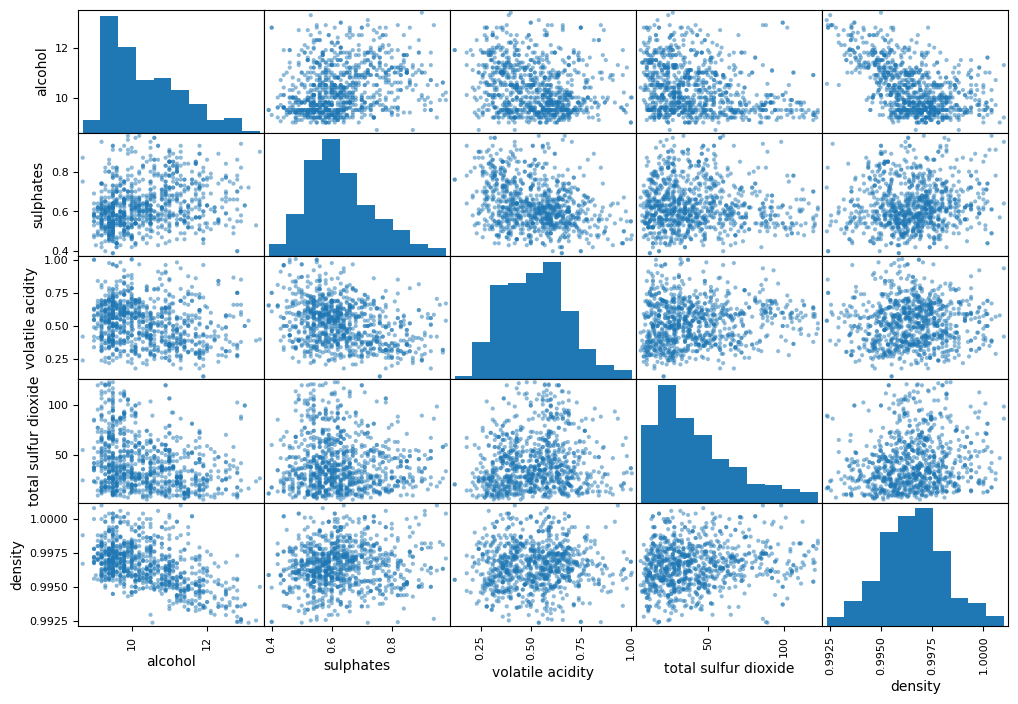

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'density']

scatter_matrix(X_train[attributes], figsize = (12, 8))
plt.show()

## 7. Model Training and Evaluation

### 7.1. Functions for Model training and Evaluation

#### 7.1.1. Function for plotting Decision Boundary using grid search
The function visualizes a classifier's decision boundary for 2D data by creating a mesh grid, predicting labels, plotting the decision regions, and overlaying actual data points with axis labels and a title.

In [ ]:
def plot_decision_boundary(pipeline, X, y, model_name, ax=None):
    """
    Plot the decision boundary for a classifier.

    Parameters:
    -----------
    pipeline : sklearn.Pipeline
        Trained pipeline containing scaler and classifier
    X : array-like
        Features (must be 2-dimensional for visualization)
    y : array-like
        Target values
    model_name : str
        Name of the model for plot title
    ax : matplotlib.axes.Axes, optional
        Axes object to plot on
    """
    if X.shape[1] != 2:
        raise ValueError("Decision boundary plotting only works with 2 features")

    if ax is None:
        ax = plt.gca()

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

    # Make predictions on mesh grid
    Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and points
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Decision Boundary - {model_name}')
    return ax

#### 7.1.2. Function for evaluating models
For each model in the provided pipeline, this function plots
- **Confusion Matrix**
- **Decision Boundary** (optional)
- **ROC curve** (optional)

and generates Classification report.

In [ ]:
def evaluate_pipeline_model(model_name, model, X_train, y_train, X_test, y_test, plot_boundary=False):

    # Create and train pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Create figure with subplots
    n_plots = 2 + (1 if plot_boundary else 0) + (1 if hasattr(model, "predict_proba") else 0)
    fig = plt.figure(figsize=(15, 4 * ((n_plots + 1) // 2)))

    # Plot 1: Confusion Matrix
    ax1 = plt.subplot(((n_plots + 1) // 2), 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax1)
    ax1.set_title(f"Confusion Matrix - {model_name}")

    # Plot 2: Decision Boundary (if requested and data is 2D)
    plot_idx = 2
    if plot_boundary:
        if X_train.shape[1] == 2:
            ax2 = plt.subplot(((n_plots + 1) // 2), 2, plot_idx)
            plot_decision_boundary(pipeline, X_test, y_test, model_name, ax=ax2)
            plot_idx += 1
        else:
            print("Warning: Decision boundary can only be plotted for 2D data")

    # Plot 3: ROC Curve (if applicable)
    if hasattr(model, "predict_proba"):
        ax3 = plt.subplot(((n_plots + 1) // 2), 2, plot_idx)
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        ax3.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
        ax3.plot([0, 1], [0, 1], 'k--')  # diagonal line
        ax3.set_xlabel("False Positive Rate")
        ax3.set_ylabel("True Positive Rate")
        ax3.set_title("ROC Curve")
        ax3.legend(loc="best")

    plt.tight_layout()
    plt.show()

    # Print Classification Report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

### 7.2. Defining each model with a pipeline

- ***Note*** :

****
**Stacking Classifier**

This is a Stacking Classifier, an ensemble learning technique that combines multiple base models (Logistic Regression, Decision Tree, and Support Vector Classifier) and uses a Random Forest as the final estimator. The model also employs 5-fold cross-validation and passthrough to allow the final estimator to access both the base model predictions and the original features.

In [ ]:
stacking_clf = StackingClassifier(
estimators=[
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Support Vector Classifier", SVC(probability=True, random_state=42)),
],
    final_estimator=RandomForestClassifier(),
    cv = KFold(n_splits=5, shuffle=True, random_state=42), # number of cross-validation folds
    passthrough = True
)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Stacking Classifier" : stacking_clf
}

### 7.3. Evaluating each model

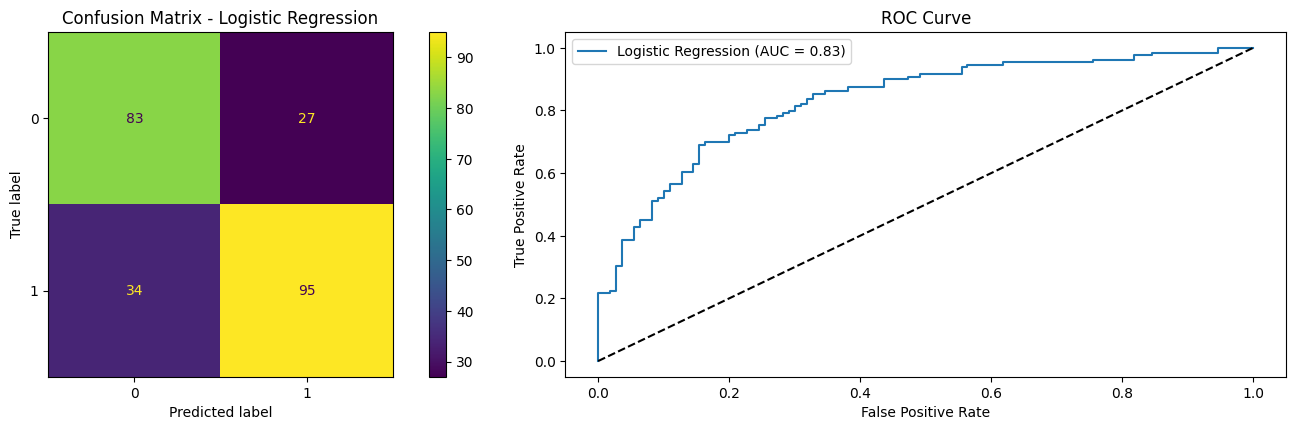


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       110
           1       0.78      0.74      0.76       129

    accuracy                           0.74       239
   macro avg       0.74      0.75      0.74       239
weighted avg       0.75      0.74      0.75       239



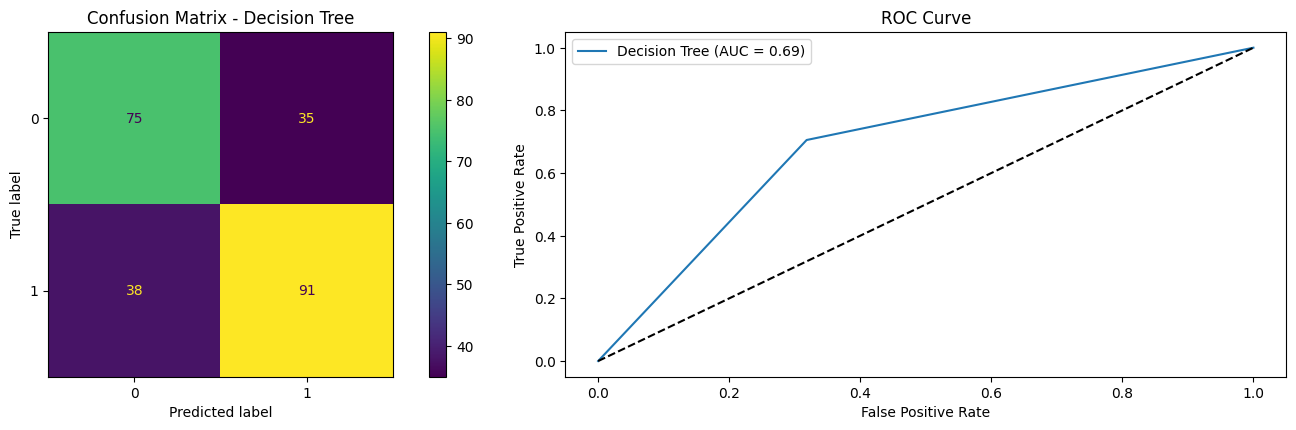


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       110
           1       0.72      0.71      0.71       129

    accuracy                           0.69       239
   macro avg       0.69      0.69      0.69       239
weighted avg       0.70      0.69      0.69       239



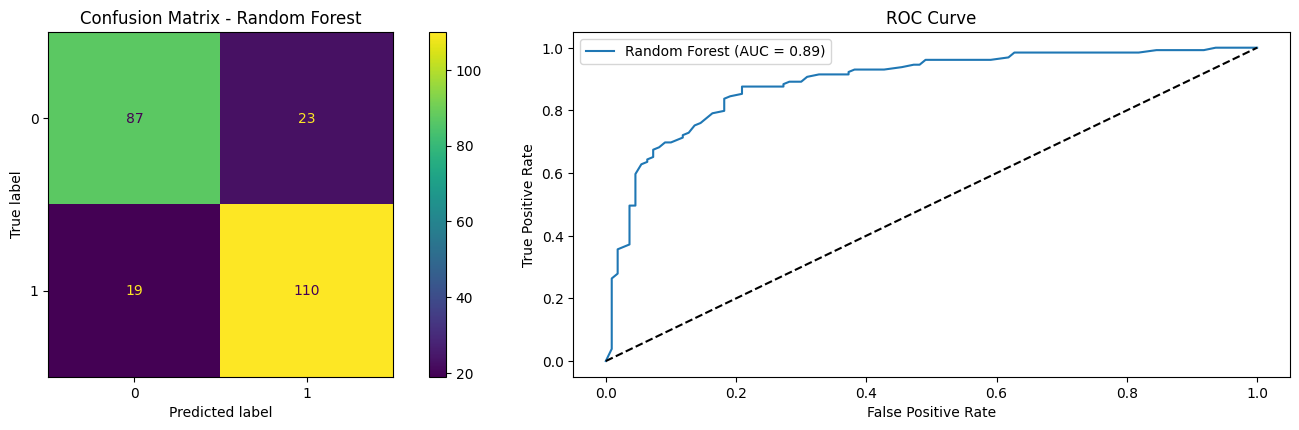


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       110
           1       0.83      0.85      0.84       129

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



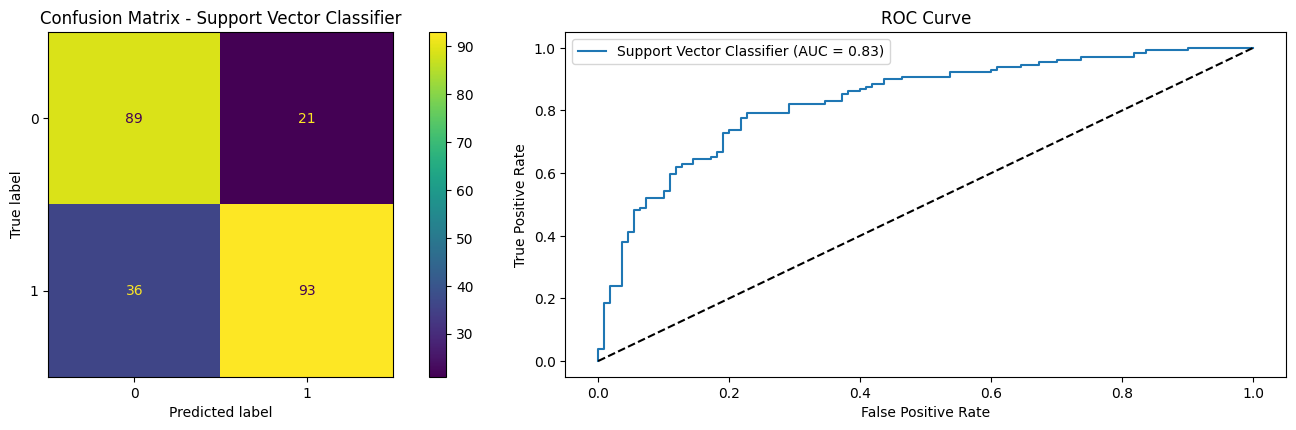


Classification Report for Support Vector Classifier:

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       110
           1       0.82      0.72      0.77       129

    accuracy                           0.76       239
   macro avg       0.76      0.77      0.76       239
weighted avg       0.77      0.76      0.76       239



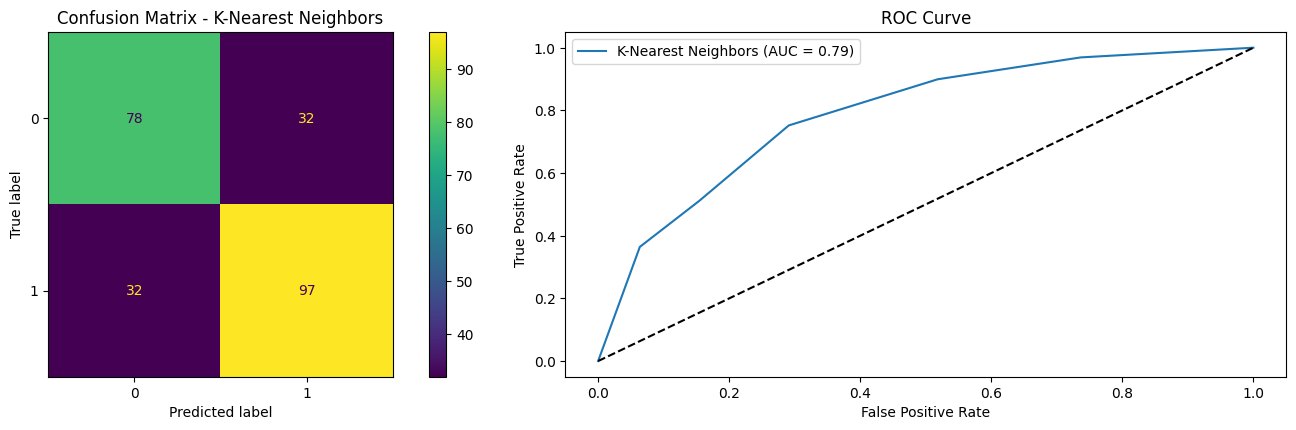


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       110
           1       0.75      0.75      0.75       129

    accuracy                           0.73       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.73      0.73      0.73       239



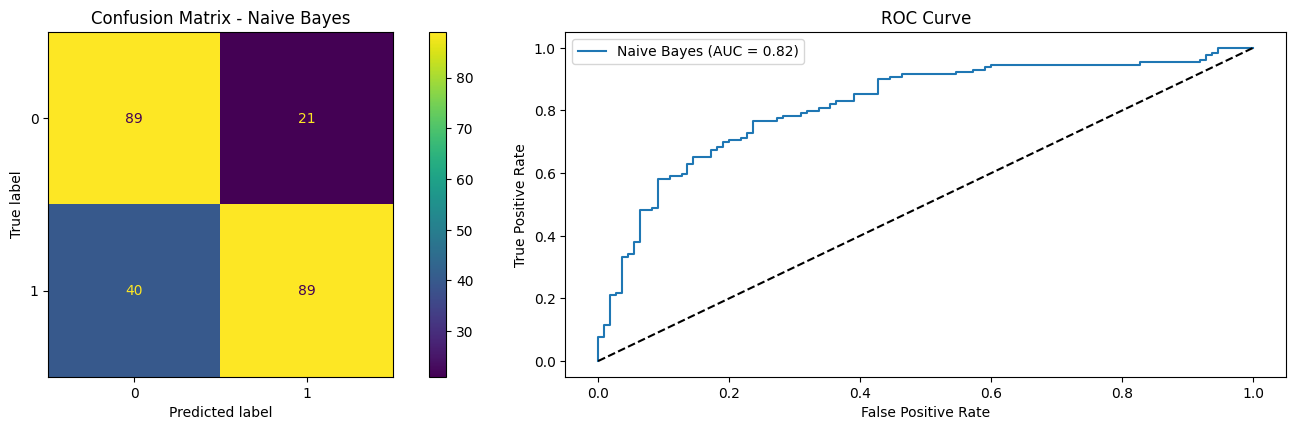


Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       110
           1       0.81      0.69      0.74       129

    accuracy                           0.74       239
   macro avg       0.75      0.75      0.74       239
weighted avg       0.75      0.74      0.74       239



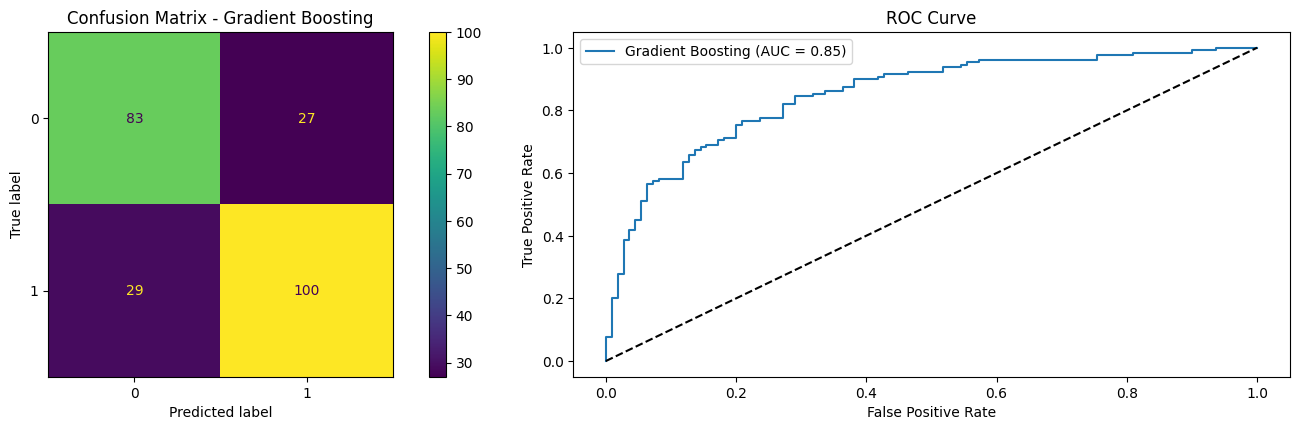


Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       110
           1       0.79      0.78      0.78       129

    accuracy                           0.77       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.77      0.77      0.77       239



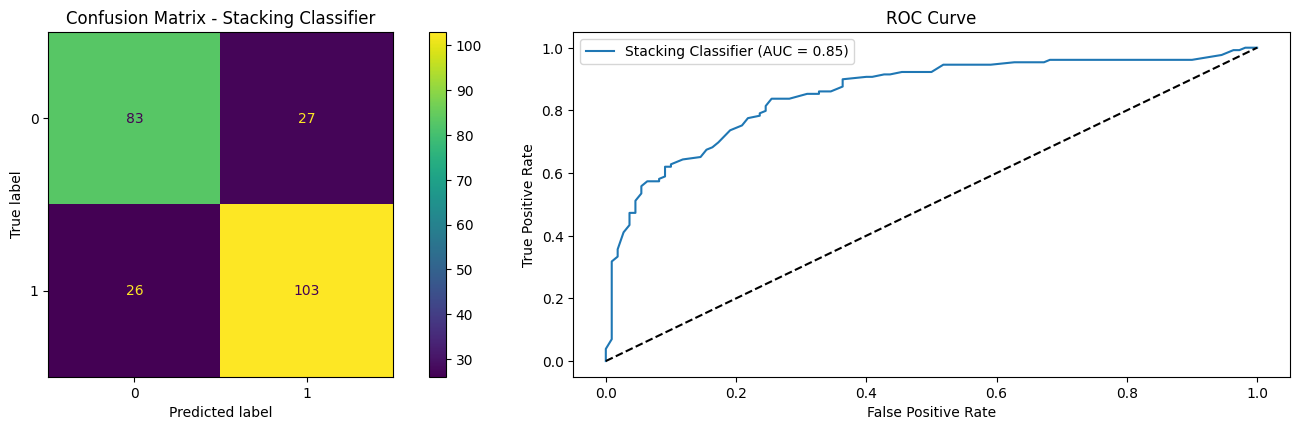


Classification Report for Stacking Classifier:

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       110
           1       0.79      0.80      0.80       129

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



In [ ]:
for model_name, model in models.items():
    evaluate_pipeline_model(model_name, model, X_selected, y_train, X_test, y_test, plot_boundary=False)

## 8. Model perfomance comparisons

### 8.1. Function for model comparisons
This function compares the performance of multiple models by evaluating metrics like accuracy, precision, recall, F1 score, AUC-ROC (if applicable), and training time, then returns the results as a sorted DataFrame.

In [ ]:
def compare_models_performance(models, X_selected, X_test, y_train, y_test):
    """
    Compare performance metrics across all models
    """
    results = []

    for model_name, model in models.items():
        # Create and train pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])

        # Train model
        pipeline.fit(X_selected, y_train)

        # Make predictions
        y_pred = pipeline.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calculate ROC AUC if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_proba = pipeline.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        else:
            auc = None

        # Training time
        start_time = time.time()
        pipeline.fit(X_selected, y_train)
        training_time = time.time() - start_time

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC-ROC': auc,
            'Training Time': training_time
        })

    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('F1 Score', ascending=False)

    return results_df


### 8.2. Performing model comparison

In [ ]:
comparison_results = compare_models_performance(models, X_selected, X_test, y_train, y_test)

#### 8.2.1. Printing formatted results





In [ ]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
print("\nModel Performance Comparison:")
print(comparison_results)


Model Performance Comparison:
                       Model  Accuracy  Precision  Recall  F1 Score  AUC-ROC  \
2              Random Forest     0.824      0.827   0.853     0.840    0.891   
7        Stacking Classifier     0.787      0.805   0.798     0.802    0.853   
6          Gradient Boosting     0.766      0.787   0.775     0.781    0.851   
3  Support Vector Classifier     0.762      0.816   0.721     0.765    0.832   
0        Logistic Regression     0.745      0.779   0.736     0.757    0.832   
4        K-Nearest Neighbors     0.732      0.752   0.752     0.752    0.789   
5                Naive Bayes     0.745      0.809   0.690     0.745    0.818   
1              Decision Tree     0.695      0.722   0.705     0.714    0.694   

   Training Time  
2          0.407  
7          0.884  
6          0.204  
3          0.223  
0          0.012  
4          0.006  
5          0.006  
1          0.010  


#### 8.2.2. Create visualizations for comparison

##### i. Bar plot for main metrics

---



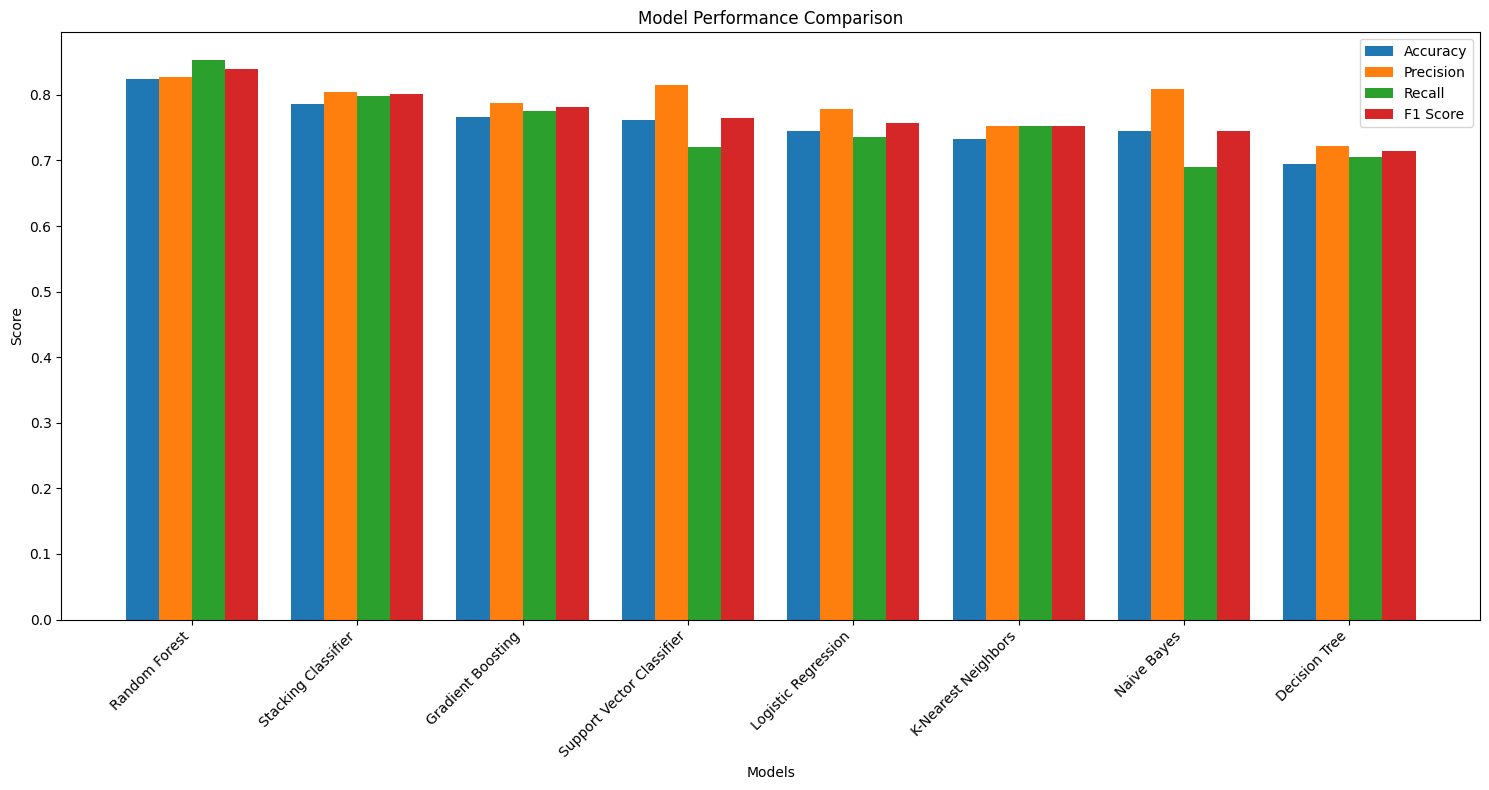

In [ ]:
plt.figure(figsize=(15, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(comparison_results['Model']))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, comparison_results[metric], width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width*1.5, comparison_results['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

##### ii. ROC Curves Comparison

---



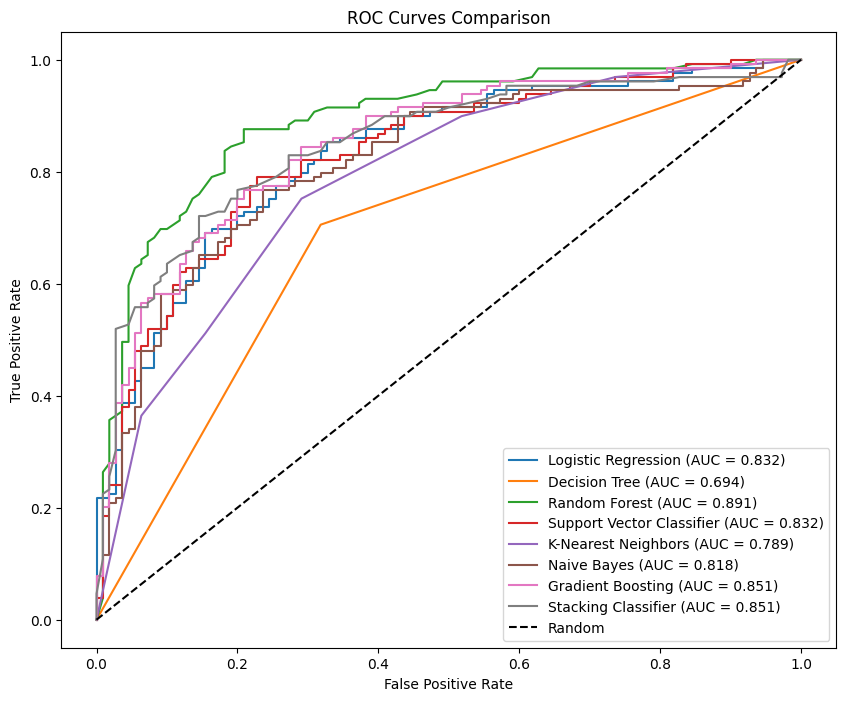

In [ ]:
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        pipeline.fit(X_selected, y_train)
        y_proba = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

##### iii. Training Time Comparison

---



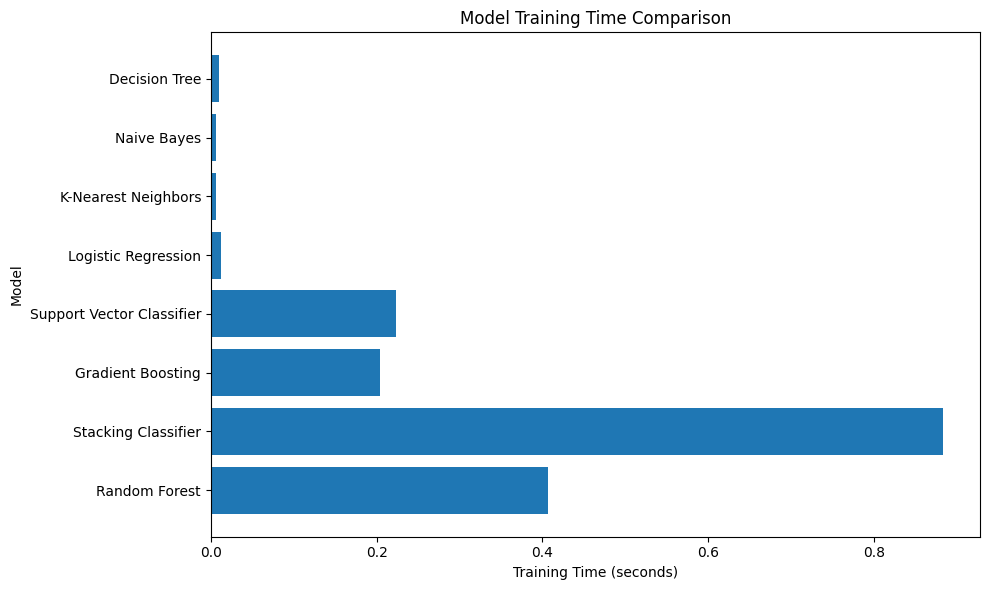

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(comparison_results['Model'], comparison_results['Training Time'])
plt.xlabel('Training Time (seconds)')
plt.ylabel('Model')
plt.title('Model Training Time Comparison')
plt.tight_layout()
plt.show()

#### 8.2.3. Statistical significance testing using McNemar's Test

##### 8.2.3.1 **Defining a function for McNemar's test**

---



In [ ]:
from scipy import stats

def perform_mcnemar_test(model1, model2, X_test, y_test):
    """
    Perform McNemar's test to compare two models
    """
    # Get predictions
    y_pred1 = model1.predict(X_test)
    y_pred2 = model2.predict(X_test)

    # Create contingency table
    b01 = np.sum((y_pred1 == y_test) & (y_pred2 != y_test))
    b10 = np.sum((y_pred1 != y_test) & (y_pred2 == y_test))

    # Perform test
    statistic = (abs(b01 - b10) - 1)**2 / (b01 + b10)
    p_value = 1 - stats.chi2.cdf(statistic, 1)

    return p_value


##### 8.2.3.2. **Performing pairwise statistical testing**

---



In [ ]:
print("\nStatistical Significance Testing (p-values):")
model_names = list(models.keys())
significance_matrix = pd.DataFrame(index=model_names, columns=model_names)

for i, model1_name in enumerate(model_names):
    for j, model2_name in enumerate(model_names):
        if i < j:
            pipeline1 = Pipeline([('scaler', StandardScaler()), ('classifier', models[model1_name])])
            pipeline2 = Pipeline([('scaler', StandardScaler()), ('classifier', models[model2_name])])

            pipeline1.fit(X_selected, y_train)
            pipeline2.fit(X_selected, y_train)

            p_value = perform_mcnemar_test(pipeline1, pipeline2, X_test, y_test)
            significance_matrix.loc[model1_name, model2_name] = p_value
            significance_matrix.loc[model2_name, model1_name] = p_value

print("\nPairwise Statistical Significance (p-values):")
print(significance_matrix.round(4))


Statistical Significance Testing (p-values):

Pairwise Statistical Significance (p-values):
                          Logistic Regression Decision Tree Random Forest  \
Logistic Regression                       NaN         0.142         0.009   
Decision Tree                           0.142           NaN         0.000   
Random Forest                           0.009         0.000           NaN   
Support Vector Classifier               0.540         0.049         0.041   
K-Nearest Neighbors                     0.779         0.336         0.004   
Naive Bayes                             0.789         0.142         0.013   
Gradient Boosting                       0.499         0.028         0.014   
Stacking Classifier                     0.188         0.015         0.009   

                          Support Vector Classifier K-Nearest Neighbors  \
Logistic Regression                           0.540               0.779   
Decision Tree                                 0.049            

##### 8.2.3.3. **Summary of findings**

---



In [ ]:
print("\nKey Findings from Model Comparison:")
best_model = comparison_results.iloc[0]['Model']
worst_model = comparison_results.iloc[-1]['Model']
fastest_model = comparison_results.loc[comparison_results['Training Time'].idxmin(), 'Model']
most_accurate = comparison_results.loc[comparison_results['Accuracy'].idxmax(), 'Model']

print(f"1. Best Overall Model (F1 Score): {best_model}")
print(f"2. Most Accurate Model: {most_accurate}")
print(f"3. Fastest Training Model: {fastest_model}")
print(f"4. Performance Gap: {comparison_results.iloc[0]['F1 Score'] - comparison_results.iloc[-1]['F1 Score']:.3f} F1 score difference between best and worst models")


Key Findings from Model Comparison:
1. Best Overall Model (F1 Score): Random Forest
2. Most Accurate Model: Random Forest
3. Fastest Training Model: Naive Bayes
4. Performance Gap: 0.126 F1 score difference between best and worst models


##### 8.2.3.4. **Calculating the stability (coefficient of variation) of multiple models using 5-fold cross-validation**

---




In [ ]:
for model_name in model_names:
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', models[model_name])])
    cv_scores = cross_val_score(pipeline, X_selected, y_train, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    cv = cv_std / cv_mean
    print(f"\n{model_name} Stability (CV): {cv:.3f}")


Logistic Regression Stability (CV): 0.019

Decision Tree Stability (CV): 0.019

Random Forest Stability (CV): 0.036

Support Vector Classifier Stability (CV): 0.026

K-Nearest Neighbors Stability (CV): 0.034

Naive Bayes Stability (CV): 0.040

Gradient Boosting Stability (CV): 0.022

Stacking Classifier Stability (CV): 0.023
